In [1]:
! pip install pymysql python-dotenv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

print("Environment variables loaded!")

Environment variables loaded!


In [4]:
# Database connection setup
try:
    # Get database credentials from environment variables (Aiven Cloud)
    DB_HOST = os.getenv('HOST', 'localhost')
    DB_PORT = int(os.getenv('PORT', 3306))
    DB_USER = os.getenv('USER', 'root')
    DB_PASSWORD = os.getenv('PASSWORD', '')
    DB_NAME = os.getenv('DB', 'defaultdb')
    
    print(f"Connecting to Aiven database: {DB_HOST}:{DB_PORT}")
    
    # Create database connection với SSL cho Aiven
    connection = pymysql.connect(
        host=DB_HOST,
        port=DB_PORT,
        user=DB_USER,
        password=DB_PASSWORD,
        database=DB_NAME,
        charset='utf8mb4',
        cursorclass=pymysql.cursors.DictCursor,
        ssl={'ssl_disabled': False}  # Enable SSL for Aiven
    )
    
    cursor = connection.cursor()
    print("Database connected successfully!")
    
    # Test connection
    cursor.execute("SHOW TABLES")
    tables = cursor.fetchall()
    table_names = [list(table.values())[0] for table in tables]
    print(f"Available tables: {table_names}")
    
except Exception as e:
    print(f"Database connection error: {e}")
    print("Creating sample data for demonstration...")
    
    # Sample data nếu không kết nối được database
    production = [
        {'year': 2018, 'area_thousand_ha': 690.0, 'output_tons': 1610000, 'export_tons': 1400000},
        {'year': 2019, 'area_thousand_ha': 695.0, 'output_tons': 1650000, 'export_tons': 1450000},
        {'year': 2020, 'area_thousand_ha': 700.0, 'output_tons': 1680000, 'export_tons': 1480000},
        {'year': 2021, 'area_thousand_ha': 705.0, 'output_tons': 1720000, 'export_tons': 1520000},
        {'year': 2022, 'area_thousand_ha': 710.0, 'output_tons': 1750000, 'export_tons': 1550000},
    ]
    
    weather = [
        {'year': 2018, 'temperature': 26.5, 'humidity': 78.0, 'rain': 1850},
        {'year': 2019, 'temperature': 27.1, 'humidity': 76.5, 'rain': 1920},
        {'year': 2020, 'temperature': 26.8, 'humidity': 79.2, 'rain': 1780},
        {'year': 2021, 'temperature': 27.3, 'humidity': 77.8, 'rain': 1950},
        {'year': 2022, 'temperature': 26.9, 'humidity': 78.5, 'rain': 1820},
    ]
    
    coffee_export = [
        {'year': 2018, 'export_value_million_usd': 3600, 'price_world_usd_per_ton': 2850, 'price_vn_usd_per_ton': 2750},
        {'year': 2019, 'export_value_million_usd': 3850, 'price_world_usd_per_ton': 3100, 'price_vn_usd_per_ton': 3000},
        {'year': 2020, 'export_value_million_usd': 3200, 'price_world_usd_per_ton': 2650, 'price_vn_usd_per_ton': 2550},
        {'year': 2021, 'export_value_million_usd': 4200, 'price_world_usd_per_ton': 3450, 'price_vn_usd_per_ton': 3350},
        {'year': 2022, 'export_value_million_usd': 4500, 'price_world_usd_per_ton': 3650, 'price_vn_usd_per_ton': 3550},
    ]
    
    print("Sample data created successfully!")
    connection = None
    cursor = None

Connecting to Aiven database: ady201-team7-ady201.e.aivencloud.com:19034
Database connected successfully!
Available tables: ['coffee_data', 'coffee_export', 'coffee_long', 'coffee_trade', 'production', 'weather']


## 1. Sản xuất cà phê trong nước

In [5]:
# Get production data từ database hoặc sample data
if cursor:
    cursor.execute("SELECT * FROM production")
    production = cursor.fetchall()
    df_production = pd.DataFrame(production)
else:
    # Sử dụng sample data đã tạo
    df_production = pd.DataFrame(production)

print("Production Data:")
print(df_production.head())
print(f"\nShape: {df_production.shape}")
print(f"\nColumns: {df_production.columns.tolist()}")
df_production

Production Data:
   id  year area_thousand_ha output_tons export_tons
0   1  2005            497.4   831000.00        None
1   2  2006            497.0   985300.00        None
2   3  2007            509.3  1251000.00  1229000.00
3   4  2008            530.9  1055811.00  1060000.00
4   5  2009            538.5  1057540.00  1183523.00

Shape: (20, 5)

Columns: ['id', 'year', 'area_thousand_ha', 'output_tons', 'export_tons']


,id,year,area_thousand_ha,output_tons,export_tons
0,1,2005,497.4,831000.00,None
1,2,2006,497.0,985300.00,None
2,3,2007,509.3,1251000.00,1229000.00
3,4,2008,530.9,1055811.00,1060000.00
4,5,2009,538.5,1057540.00,1183523.00
5,6,2010,554.8,1105700.00,1217868.00
6,7,2011,586.2,1276506.00,1257246.00
7,8,2012,623.0,1260463.00,1732156.00
8,9,2013,637.0,1326688.00,1300146.00
9,10,2014,641.2,1406469.00,1690564.00


In [6]:
df_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                20 non-null     int64 
 1   year              20 non-null     int64 
 2   area_thousand_ha  20 non-null     object
 3   output_tons       19 non-null     object
 4   export_tons       18 non-null     object
dtypes: int64(2), object(3)
memory usage: 932.0+ bytes


In [7]:
# Đảm bảo các cột số thực sự ở dạng float
numeric_cols = ['area_thousand_ha', 'output_tons', 'export_tons']
df_production[numeric_cols] = df_production[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Thực hiện nội suy đầy đủ theo hai chiều
df_production = df_production.interpolate(method='linear', limit_direction='both')

# Kiểm tra lại kết quả
print(df_production.info())
print(df_production)
print("\nSố lượng giá trị null còn lại:")
print(df_production.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20 non-null     int64  
 1   year              20 non-null     int64  
 2   area_thousand_ha  20 non-null     float64
 3   output_tons       20 non-null     float64
 4   export_tons       20 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 932.0 bytes
None
    id  year  area_thousand_ha  output_tons  export_tons
0    1  2005             497.4     831000.0    1229000.0
1    2  2006             497.0     985300.0    1229000.0
2    3  2007             509.3    1251000.0    1229000.0
3    4  2008             530.9    1055811.0    1060000.0
4    5  2009             538.5    1057540.0    1183523.0
5    6  2010             554.8    1105700.0    1217868.0
6    7  2011             586.2    1276506.0    1257246.0
7    8  2012             623.0    1260463.0    173215

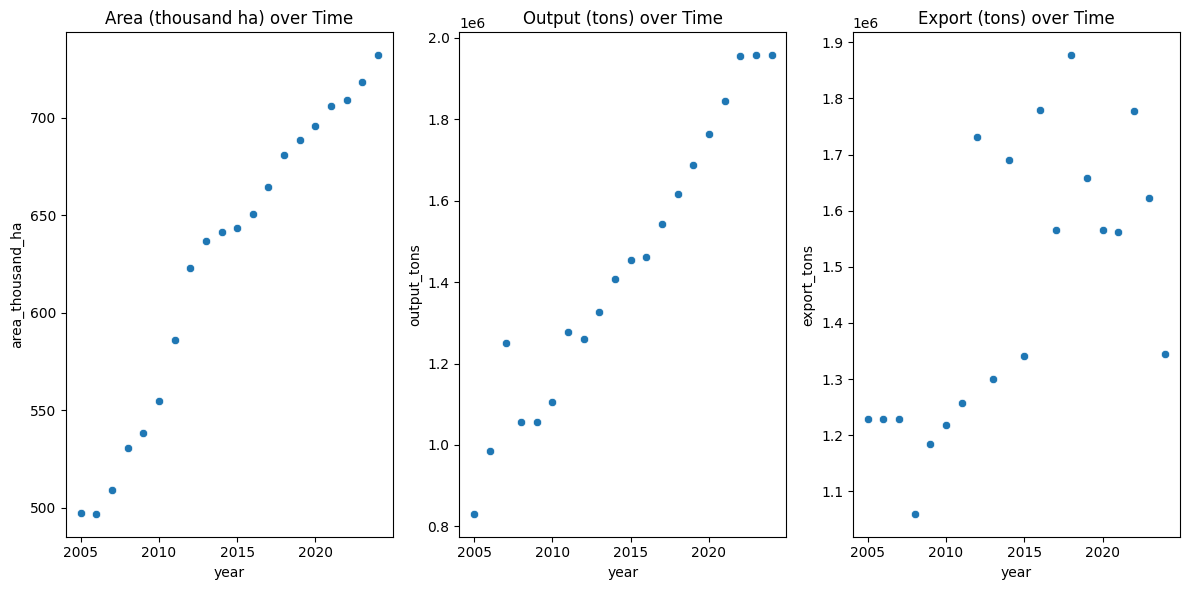

In [8]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df_production, x='year', y='area_thousand_ha')
plt.title('Area (thousand ha) over Time')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df_production, x='year', y='output_tons')
plt.title('Output (tons) over Time')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df_production, x='year', y='export_tons')
plt.title('Export (tons) over Time')

plt.tight_layout()
plt.show()


In [9]:
cursor.execute("select * from weather")
weather = cursor.fetchall()
df_weather = pd.DataFrame(weather)

In [10]:
df_weather

,id,year,temperature,humidity,rain
0,1,2005,22.61,81.33,2424.5
1,2,2006,23.04,81.08,2111.9
2,3,2007,22.92,81.08,2062.0
3,4,2008,22.62,81.33,2329.3
4,5,2009,22.79,82.50,1887.3
5,6,2010,23.34,80.92,1890.0
6,7,2011,22.91,80.08,1634.1
7,8,2012,22.43,80.17,2457.7
8,9,2013,22.44,80.25,2243.8
9,10,2014,22.54,80.83,2207.5


In [12]:
# Merge weather and production data
merged_df = pd.merge(df_production, df_weather, on='year', how='inner')
print(f"Merged weather + production data: {merged_df.shape}")
print("\nSample merged data:")
print(merged_df[['year', 'temperature', 'humidity', 'rain', 'output_tons']].head())

Merged weather + production data: (20, 9)

Sample merged data:
   year temperature humidity    rain  output_tons
0  2005       22.61    81.33  2424.5     831000.0
1  2006       23.04    81.08  2111.9     985300.0
2  2007       22.92    81.08  2062.0    1251000.0
3  2008       22.62    81.33  2329.3    1055811.0
4  2009       22.79    82.50  1887.3    1057540.0


## Part 2: Kim Ngạch Xuất Khẩu và Giá Cà Phê

#Phân tích mối quan hệ giữa kim ngạch xuất khẩu và giá cà phê thế giới/Việt Nam


In [11]:
# Fetch coffee export data (kim ngạch + giá)
cursor.execute("SELECT * FROM coffee_export")
coffee_export = cursor.fetchall()
df_export = pd.DataFrame(coffee_export)

print("Coffee Export Data:")
print(df_export.head())
print(f"\nShape: {df_export.shape}")
print(f"\nColumns: {df_export.columns.tolist()}")

Coffee Export Data:
   id  year export_value_million_usd price_world_usd_per_ton  \
0   1  2005                     None                 1114.68   
1   2  2006                     None                 1489.86   
2   3  2007                  1911.00                 1910.01   
3   4  2008                  2111.00                 2319.18   
4   5  2009                  1730.60                 1643.41   

  price_vn_usd_per_ton  
0                 None  
1                 None  
2              1554.92  
3              1991.51  
4              1462.24  

Shape: (20, 5)

Columns: ['id', 'year', 'export_value_million_usd', 'price_world_usd_per_ton', 'price_vn_usd_per_ton']


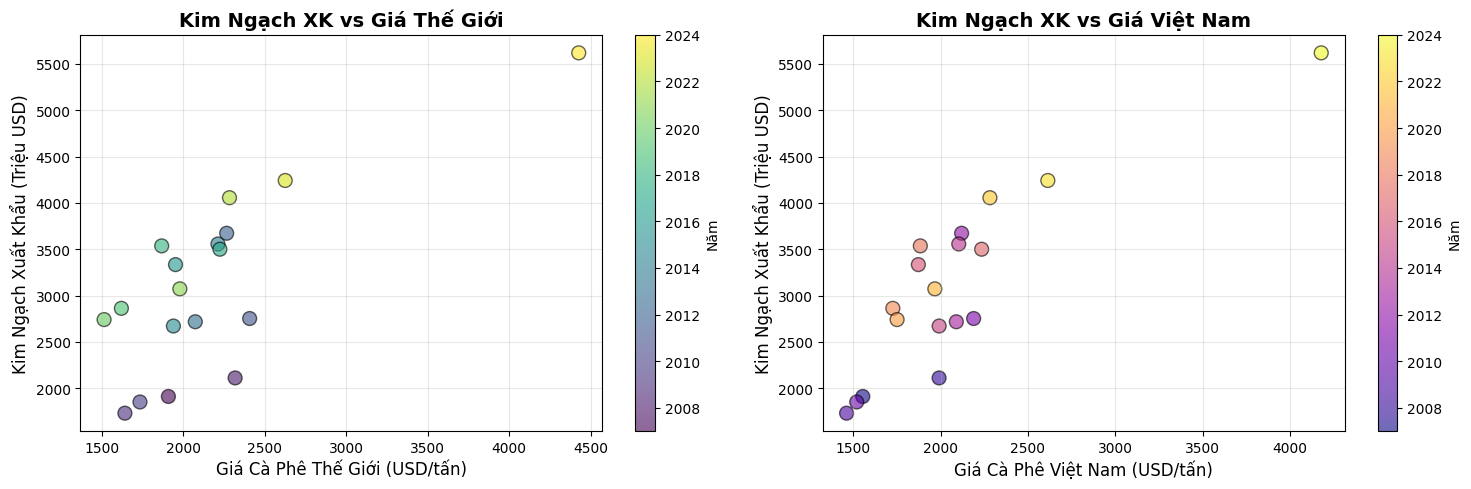


Correlation Kim Ngạch vs Giá Thế Giới: 0.770
Correlation Kim Ngạch vs Giá Việt Nam: 0.864


In [13]:
# Scatter Plot: Kim Ngạch vs Giá Cà Phê
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Kim ngạch vs Giá thế giới
axes[0].scatter(df_export['price_world_usd_per_ton'], df_export['export_value_million_usd'], 
                s=100, alpha=0.6, c=df_export['year'], cmap='viridis', edgecolors='black')
axes[0].set_xlabel('Giá Cà Phê Thế Giới (USD/tấn)', fontsize=12)
axes[0].set_ylabel('Kim Ngạch Xuất Khẩu (Triệu USD)', fontsize=12)
axes[0].set_title('Kim Ngạch XK vs Giá Thế Giới', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
cbar1 = plt.colorbar(axes[0].collections[0], ax=axes[0])
cbar1.set_label('Năm', fontsize=10)

# Kim ngạch vs Giá Việt Nam
axes[1].scatter(df_export['price_vn_usd_per_ton'], df_export['export_value_million_usd'], 
                s=100, alpha=0.6, c=df_export['year'], cmap='plasma', edgecolors='black')
axes[1].set_xlabel('Giá Cà Phê Việt Nam (USD/tấn)', fontsize=12)
axes[1].set_ylabel('Kim Ngạch Xuất Khẩu (Triệu USD)', fontsize=12)
axes[1].set_title('Kim Ngạch XK vs Giá Việt Nam', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
cbar2 = plt.colorbar(axes[1].collections[0], ax=axes[1])
cbar2.set_label('Năm', fontsize=10)

plt.tight_layout()
plt.show()

# Calculate correlation
corr_world = df_export[['export_value_million_usd', 'price_world_usd_per_ton']].corr().iloc[0, 1]
corr_vn = df_export[['export_value_million_usd', 'price_vn_usd_per_ton']].corr().iloc[0, 1]

print(f"\nCorrelation Kim Ngạch vs Giá Thế Giới: {corr_world:.3f}")
print(f"Correlation Kim Ngạch vs Giá Việt Nam: {corr_vn:.3f}")

## Part 3: Sản Lượng vs Kim Ngạch Xuất Khẩu

Phân tích mối quan hệ giữa sản lượng xuất khẩu và kim ngạch

In [14]:
# Merge production and export data
merged_prod_export = pd.merge(df_production, df_export, on='year', how='inner')

print(f"Merged production + export data: {merged_prod_export.shape}")
print("\nPreview:")
print(merged_prod_export[['year', 'output_tons', 'export_tons', 'export_value_million_usd']].head())

Merged production + export data: (20, 9)

Preview:
   year  output_tons  export_tons export_value_million_usd
0  2005     831000.0    1229000.0                     None
1  2006     985300.0    1229000.0                     None
2  2007    1251000.0    1229000.0                  1911.00
3  2008    1055811.0    1060000.0                  2111.00
4  2009    1057540.0    1183523.0                  1730.60


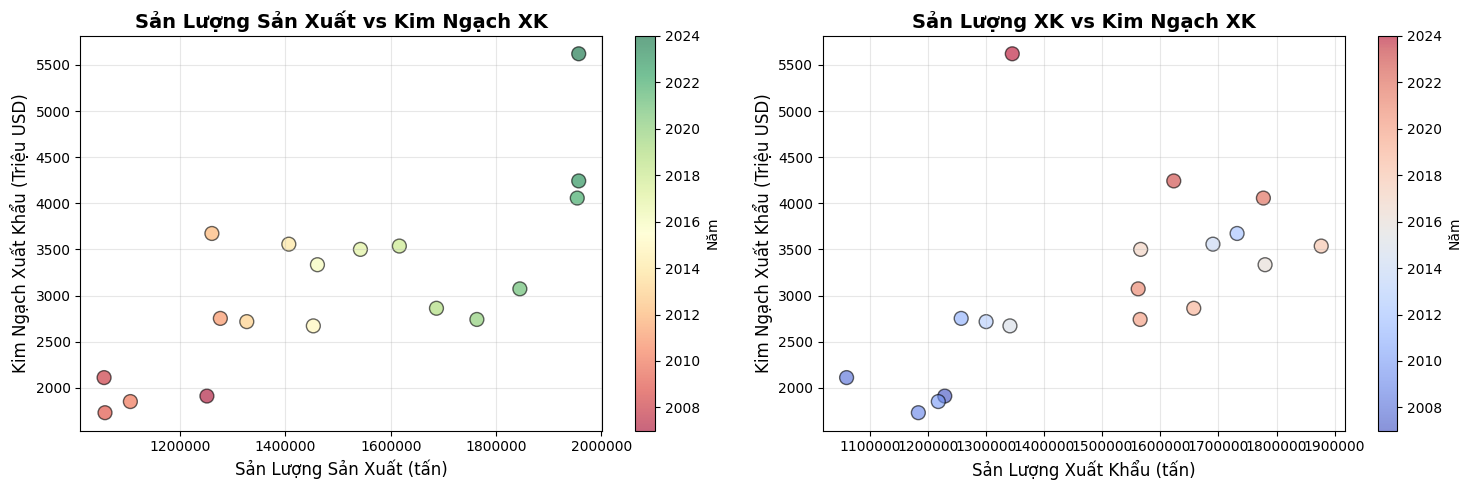


Correlation Sản Lượng Sản Xuất vs Kim Ngạch: 0.753
Correlation Sản Lượng Xuất Khẩu vs Kim Ngạch: 0.543


In [15]:
# Scatter Plot: Sản Lượng vs Kim Ngạch
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Sản lượng sản xuất vs Kim ngạch
axes[0].scatter(merged_prod_export['output_tons'], merged_prod_export['export_value_million_usd'], 
                s=100, alpha=0.6, c=merged_prod_export['year'], cmap='RdYlGn', edgecolors='black')
axes[0].set_xlabel('Sản Lượng Sản Xuất (tấn)', fontsize=12)
axes[0].set_ylabel('Kim Ngạch Xuất Khẩu (Triệu USD)', fontsize=12)
axes[0].set_title('Sản Lượng Sản Xuất vs Kim Ngạch XK', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].ticklabel_format(style='plain', axis='x')
cbar1 = plt.colorbar(axes[0].collections[0], ax=axes[0])
cbar1.set_label('Năm', fontsize=10)

# Sản lượng xuất khẩu vs Kim ngạch
axes[1].scatter(merged_prod_export['export_tons'], merged_prod_export['export_value_million_usd'], 
                s=100, alpha=0.6, c=merged_prod_export['year'], cmap='coolwarm', edgecolors='black')
axes[1].set_xlabel('Sản Lượng Xuất Khẩu (tấn)', fontsize=12)
axes[1].set_ylabel('Kim Ngạch Xuất Khẩu (Triệu USD)', fontsize=12)
axes[1].set_title('Sản Lượng XK vs Kim Ngạch XK', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].ticklabel_format(style='plain', axis='x')
cbar2 = plt.colorbar(axes[1].collections[0], ax=axes[1])
cbar2.set_label('Năm', fontsize=10)

plt.tight_layout()
plt.show()

# Calculate correlations
corr_output = merged_prod_export[['output_tons', 'export_value_million_usd']].corr().iloc[0, 1]
corr_export = merged_prod_export[['export_tons', 'export_value_million_usd']].corr().iloc[0, 1]

print(f"\nCorrelation Sản Lượng Sản Xuất vs Kim Ngạch: {corr_output:.3f}")
print(f"Correlation Sản Lượng Xuất Khẩu vs Kim Ngạch: {corr_export:.3f}")

## Part 4: Scatter Plots Chi Tiết - Weather vs Production

Phân tích chi tiết các mối quan hệ giữa thời tiết và sản xuất

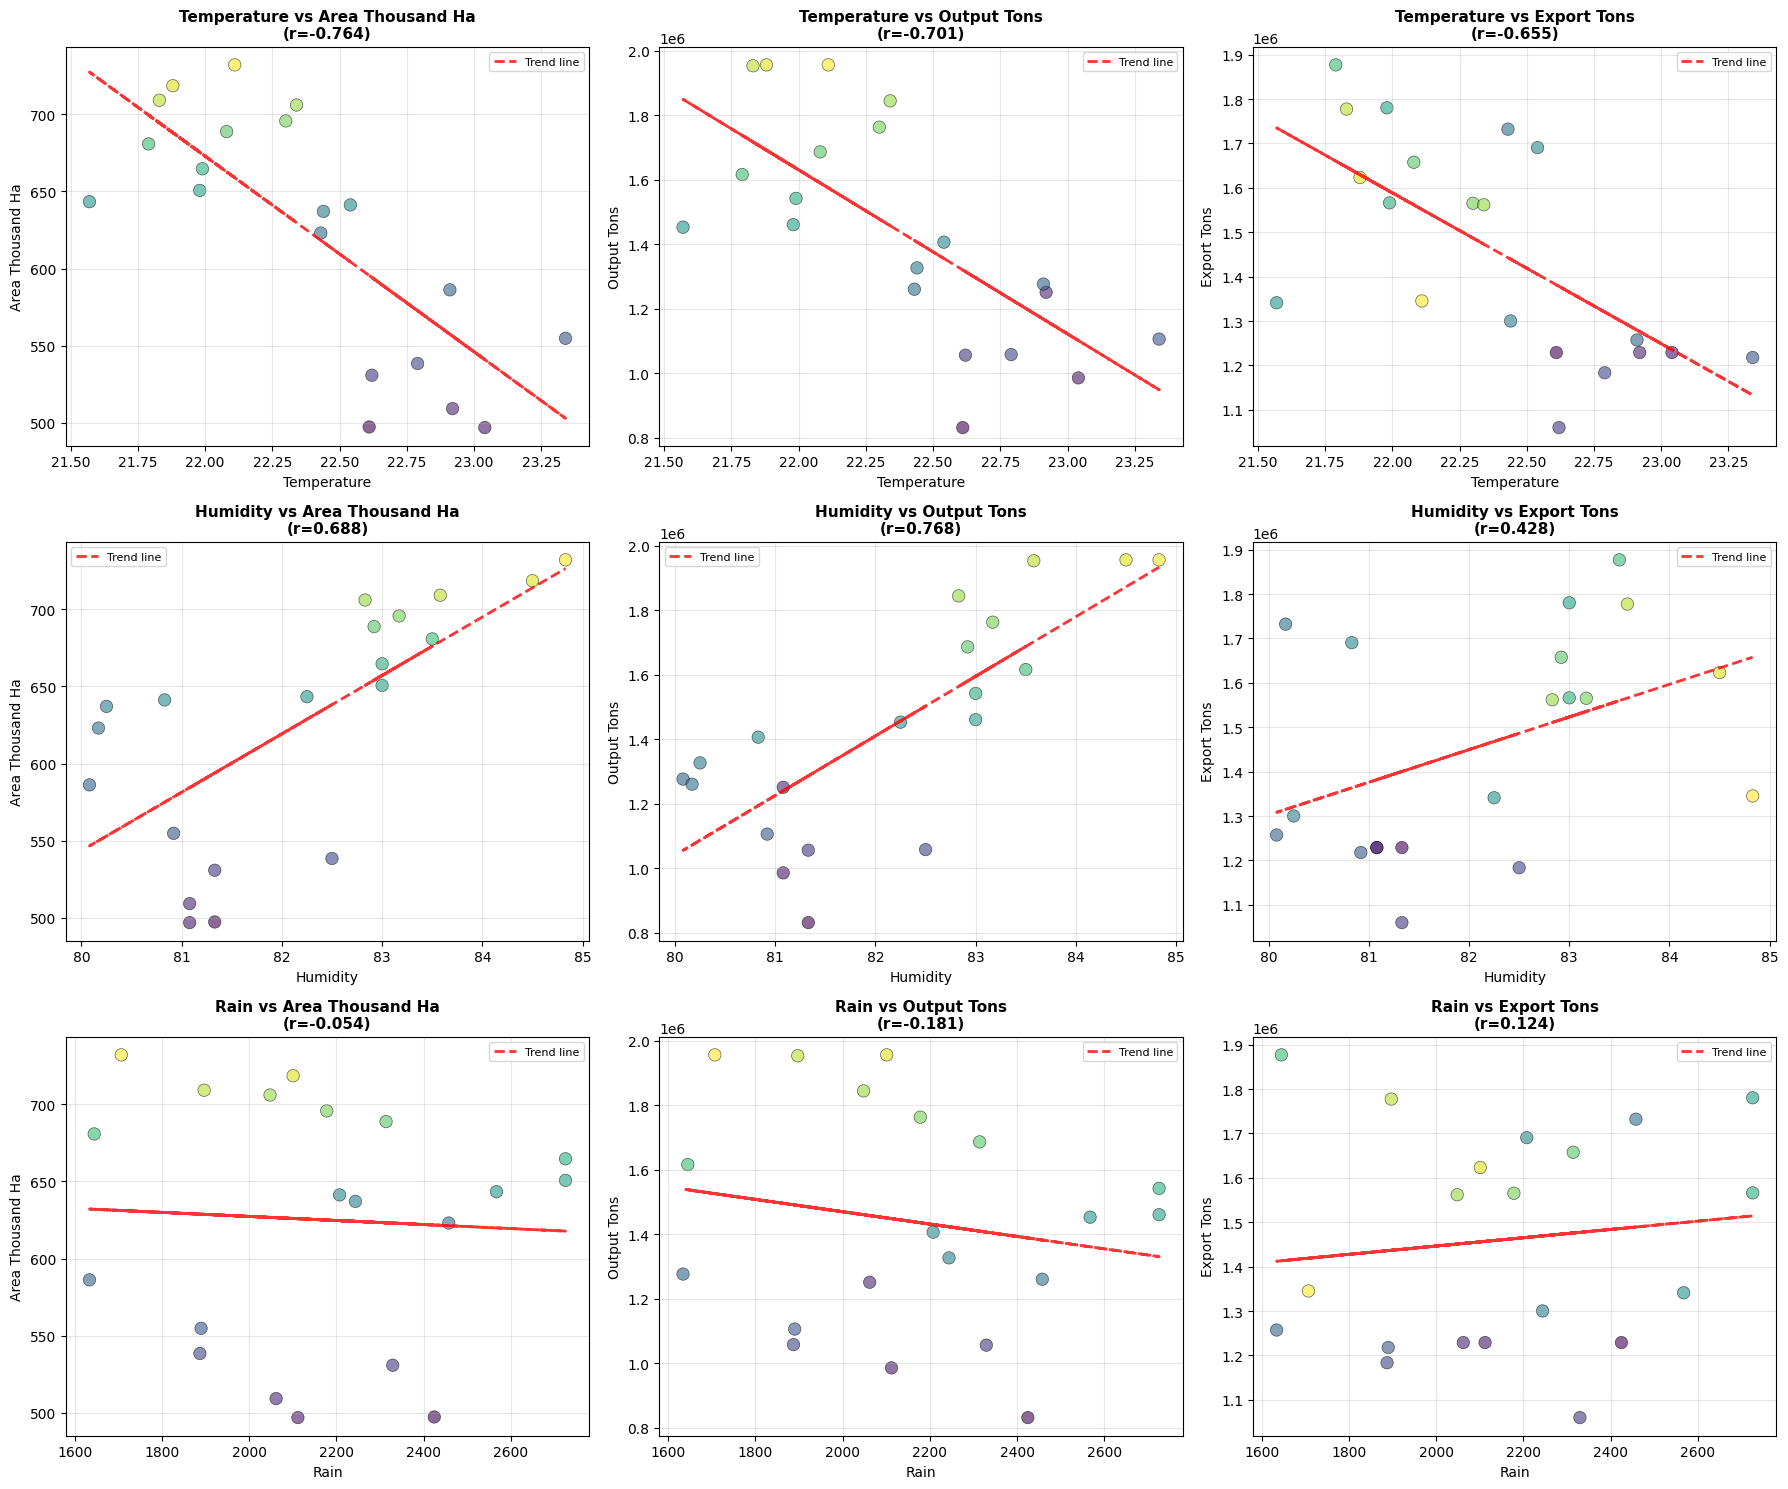

Các scatter plot chi tiết đã được tạo!


In [16]:
# Detailed Scatter Plots: Weather factors vs Production metrics
import numpy as np

# Ensure all data is float (fix Decimal issue)
weather_vars = ['temperature', 'humidity', 'rain']
prod_vars = ['area_thousand_ha', 'output_tons', 'export_tons']

for col in weather_vars + prod_vars:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

fig, axes = plt.subplots(3, 3, figsize=(18, 15))

for i, weather in enumerate(weather_vars):
    for j, prod in enumerate(prod_vars):
        ax = axes[i, j]
        
        # Filter out NaN values for both variables
        valid_mask = merged_df[[weather, prod]].notna().all(axis=1)
        x_data = merged_df.loc[valid_mask, weather].astype(float)
        y_data = merged_df.loc[valid_mask, prod].astype(float)
        year_data = merged_df.loc[valid_mask, 'year']
        
        # Scatter plot with trend line
        scatter = ax.scatter(x_data, y_data, 
                  s=80, alpha=0.6, c=year_data, 
                  cmap='viridis', edgecolors='black', linewidth=0.5)
        
        # Add trend line
        if len(x_data) > 1:
            z = np.polyfit(x_data, y_data, 1)
            p = np.poly1d(z)
            ax.plot(x_data, p(x_data), 
                   "r--", alpha=0.8, linewidth=2, label='Trend line')
        
        # Calculate correlation
        corr = x_data.corr(y_data) if len(x_data) > 1 else 0
        
        # Labels and title
        ax.set_xlabel(weather.replace('_', ' ').title(), fontsize=10)
        ax.set_ylabel(prod.replace('_', ' ').title(), fontsize=10)
        ax.set_title(f'{weather.title()} vs {prod.replace("_", " ").title()}\n(r={corr:.3f})', 
                    fontsize=11, fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

print("Các scatter plot chi tiết đã được tạo!")

## Part 5: Correlation Matrix Tổng Hợp

Ma trận tương quan tổng hợp cho tất cả các biến quan trọng

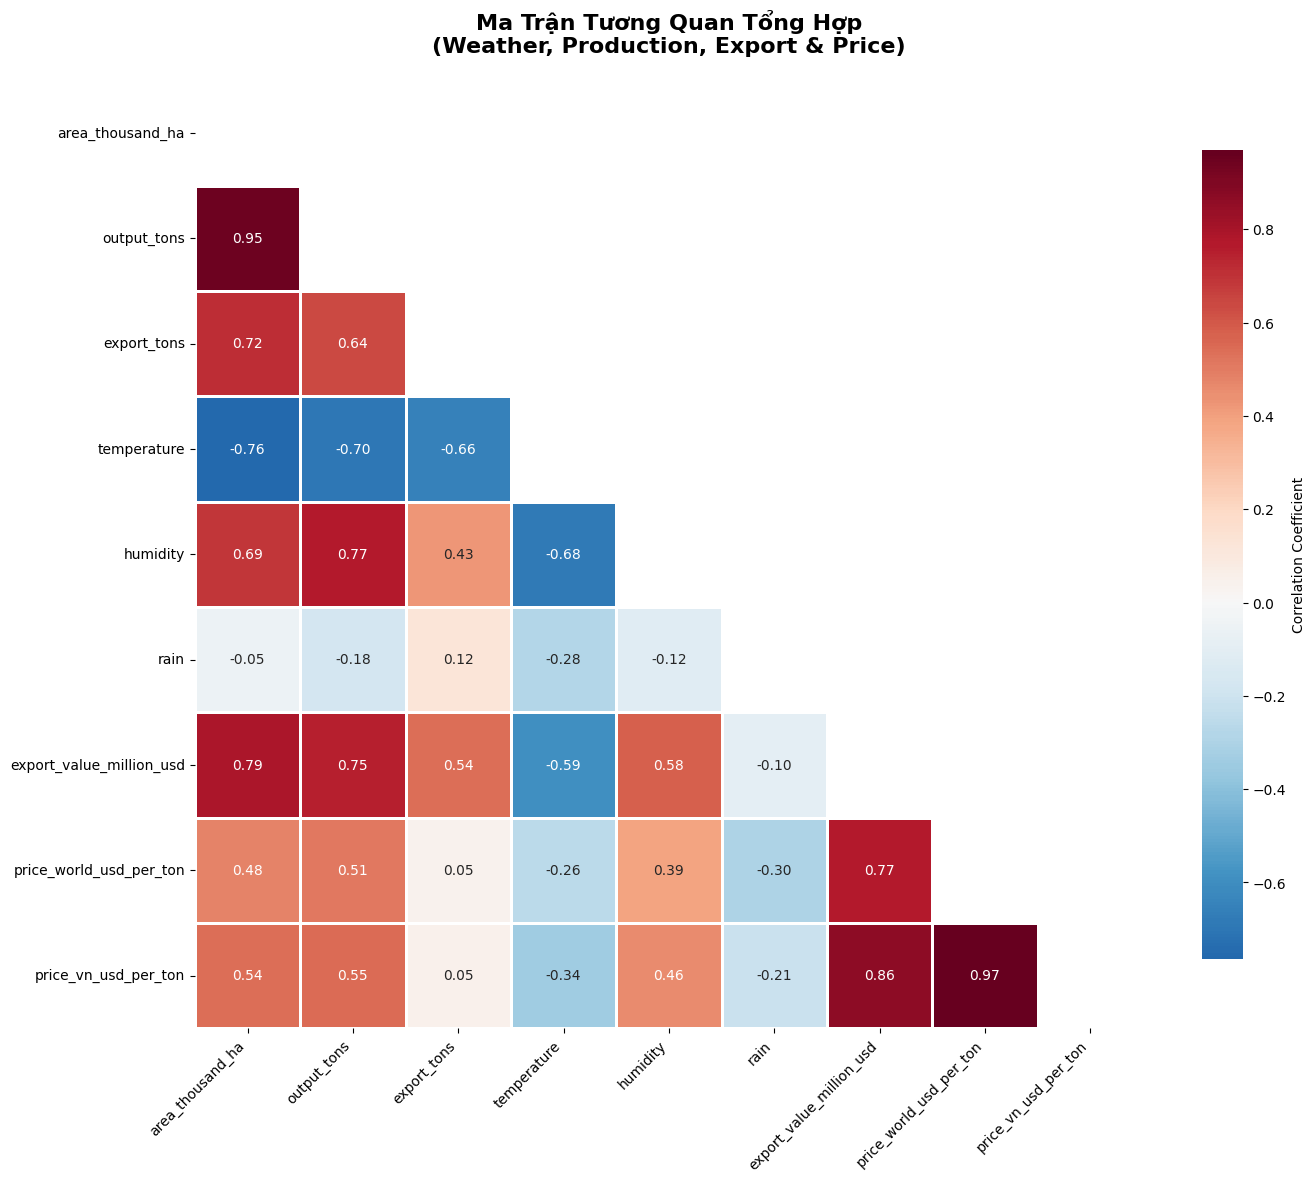

Ma trận tương quan tổng hợp đã được tạo!

Kích thước dữ liệu: (20, 13)


In [17]:
# Merge all data: production + weather + export
full_merged = pd.merge(merged_df, df_export, on='year', how='inner')

# Select key variables for comprehensive correlation
key_vars = [
    'area_thousand_ha', 'output_tons', 'export_tons',
    'temperature', 'humidity', 'rain',
    'export_value_million_usd', 'price_world_usd_per_ton', 'price_vn_usd_per_ton'
]

# Create correlation matrix
comprehensive_corr = full_merged[key_vars].corr()

# Visualize with enhanced heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(comprehensive_corr, dtype=bool))  # Mask upper triangle
sns.heatmap(comprehensive_corr, 
            mask=mask,
            annot=True, 
            fmt=".2f",
            cmap='RdBu_r',
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"})

plt.title('Ma Trận Tương Quan Tổng Hợp\n(Weather, Production, Export & Price)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

print("Ma trận tương quan tổng hợp đã được tạo!")
print(f"\nKích thước dữ liệu: {full_merged.shape}")

## Part 6: Top Correlations Summary

Tóm tắt các mối tương quan mạnh nhất


TOP 10 TƯƠNG QUAN MẠNH NHẤT
              Variable 1               Variable 2  Correlation
 price_world_usd_per_ton     price_vn_usd_per_ton     0.970331
        area_thousand_ha              output_tons     0.945703
export_value_million_usd     price_vn_usd_per_ton     0.863556
        area_thousand_ha export_value_million_usd     0.791501
export_value_million_usd  price_world_usd_per_ton     0.769502
             output_tons                 humidity     0.767911
        area_thousand_ha              temperature    -0.764038
             output_tons export_value_million_usd     0.753332
        area_thousand_ha              export_tons     0.719196
             output_tons              temperature    -0.700540

TOP 10 TƯƠNG QUAN YẾU NHẤT
      Variable 1               Variable 2  Correlation
     temperature                     rain    -0.280799
     temperature  price_world_usd_per_ton    -0.260200
            rain     price_vn_usd_per_ton    -0.213463
     output_tons               

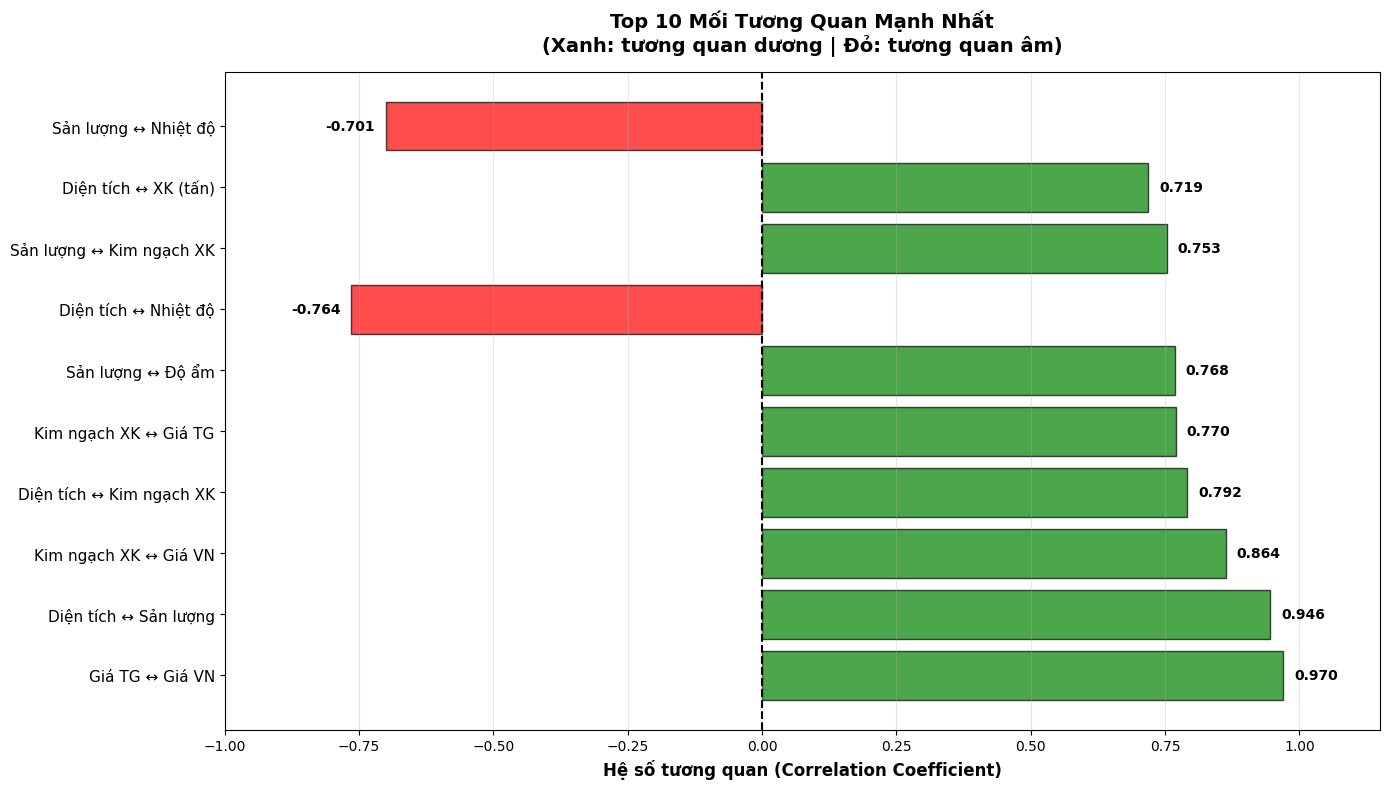


Phân tích hoàn tất!


In [18]:
# Extract and rank correlations
corr_pairs = []
for i in range(len(comprehensive_corr.columns)):
    for j in range(i+1, len(comprehensive_corr.columns)):
        corr_pairs.append({
            'Variable 1': comprehensive_corr.columns[i],
            'Variable 2': comprehensive_corr.columns[j],
            'Correlation': comprehensive_corr.iloc[i, j]
        })

corr_df = pd.DataFrame(corr_pairs)
corr_df['Abs_Correlation'] = corr_df['Correlation'].abs()
corr_df = corr_df.sort_values('Abs_Correlation', ascending=False)

print("=" * 80)
print("TOP 10 TƯƠNG QUAN MẠNH NHẤT")
print("=" * 80)
print(corr_df.head(10)[['Variable 1', 'Variable 2', 'Correlation']].to_string(index=False))

print("\n" + "=" * 80)
print("TOP 10 TƯƠNG QUAN YẾU NHẤT")
print("=" * 80)
print(corr_df.tail(10)[['Variable 1', 'Variable 2', 'Correlation']].to_string(index=False))

# Visualize top correlations with better formatting
top_10 = corr_df.head(10).copy()

# Tạo tên ngắn gọn và dễ đọc
def shorten_name(name):
    name_map = {
        'area_thousand_ha': 'Diện tích',
        'output_tons': 'Sản lượng',
        'export_tons': 'XK (tấn)',
        'temperature': 'Nhiệt độ',
        'humidity': 'Độ ẩm',
        'rain': 'Lượng mưa',
        'export_value_million_usd': 'Kim ngạch XK',
        'price_world_usd_per_ton': 'Giá TG',
        'price_vn_usd_per_ton': 'Giá VN'
    }
    return name_map.get(name, name)

# Tạo labels đẹp hơn
top_10['Label'] = top_10.apply(
    lambda row: f"{shorten_name(row['Variable 1'])} ↔ {shorten_name(row['Variable 2'])}", 
    axis=1
)

plt.figure(figsize=(14, 8))
colors = ['green' if x > 0 else 'red' for x in top_10['Correlation']]
bars = plt.barh(range(len(top_10)), top_10['Correlation'], color=colors, alpha=0.7, edgecolor='black')

# Thêm giá trị correlation vào cuối mỗi thanh
for idx, (bar, corr) in enumerate(zip(bars, top_10['Correlation'])):
    plt.text(corr + 0.02 if corr > 0 else corr - 0.02, 
             idx, f'{corr:.3f}', 
             va='center', ha='left' if corr > 0 else 'right',
             fontweight='bold', fontsize=10)

plt.yticks(range(len(top_10)), top_10['Label'], fontsize=11)
plt.xlabel('Hệ số tương quan (Correlation Coefficient)', fontsize=12, fontweight='bold')
plt.title('Top 10 Mối Tương Quan Mạnh Nhất\n(Xanh: tương quan dương | Đỏ: tương quan âm)', 
          fontsize=14, fontweight='bold', pad=15)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5)
plt.grid(True, alpha=0.3, axis='x')
plt.xlim(-1, 1.15)
plt.tight_layout()
plt.show()

print("\nPhân tích hoàn tất!")

In [ ]:
# Close database connection
connection.close()
print("Database connection closed")


Error: Already closed

In [ ]:
print(".")

.
